In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="TbG4o6EFfJ15o6vHSJi8")
project = rf.workspace("dth-zmcok").project("shrimp-larvae-detection-snnea")
version = project.version(1)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Shrimp-larvae-detection-1 in yolov11:: 100%|██████████| 9458/9458 [00:07<00:00, 1285.91it/s]


In [2]:
from PIL import Image
from ultralytics import RTDETR
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import cv2
import json
import glob
import torch
%matplotlib inline

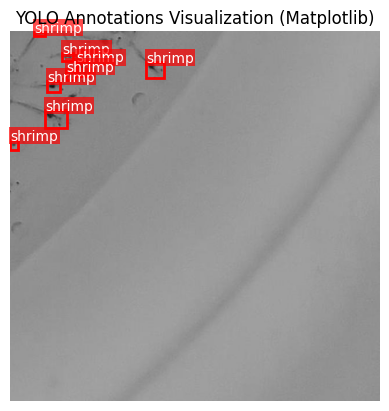

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os

def visualize_yolo_matplotlib(image_path, label_path, class_list):
    """
    Reads a YOLO .txt label file and displays the bounding boxes on the image using Matplotlib.

    :param image_path: Path to the image file (e.g., 'data/images/test.jpg').
    :param label_path: Path to the corresponding YOLO .txt annotation file.
    :param class_list: A list of class names (e.g., ['person', 'car']).
    """
    image_bgr = cv2.imread(image_path)
    if image_bgr is None:
        print(f"Error: Could not load image at {image_path}")
        return
    
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    H, W, _ = image_rgb.shape

    try:
        with open(label_path, 'r') as f:
            annotations = f.readlines()
    except FileNotFoundError:
        print(f"Warning: No label file found at {label_path}. Skipping.")
        annotations = []

    _, ax = plt.subplots(1)
    ax.imshow(image_rgb)
    ax.axis('off') 

    for line in annotations:
        parts = line.strip().split()
        if len(parts) < 5:
            continue

        class_id = int(parts[0])
        x_c_n, y_c_n, w_n, h_n = map(float, parts[1:5])

        x_center = x_c_n * W
        y_center = y_c_n * H
        width = w_n * W
        height = h_n * H

        x_min = x_center - (width / 2)
        y_min = y_center - (height / 2)

        class_name = class_list[class_id] if class_id < len(class_list) else f"Class {class_id}"
        
        rect = patches.Rectangle(
            (x_min, y_min),      
            width,              
            height,              
            linewidth=2,
            edgecolor='r',       
            facecolor='none',    
            label=class_name
        )
        ax.add_patch(rect)

        ax.text(
            x_min, 
            y_min, 
            class_name, 
            color='white', 
            fontsize=10, 
            bbox=dict(facecolor='red', alpha=0.7, edgecolor='none', pad=1)
        )

    plt.title("YOLO Annotations Visualization (Matplotlib)")
    plt.show()


MY_CLASSES = ['shrimp']

IMAGE_DIR = 'Shrimp-larvae-detection-1/train/images/'
LABEL_DIR = 'Shrimp-larvae-detection-1/train/labels/'
IMAGE_FILENAME = 'patch_46_IMG20240107114027_jpg.rf.a48d62ef5f48e33e3801449aaa29d196.jpg' 
LABEL_FILENAME = 'patch_46_IMG20240107114027_jpg.rf.a48d62ef5f48e33e3801449aaa29d196.txt'

image_full_path = os.path.join(IMAGE_DIR, IMAGE_FILENAME)
label_full_path = os.path.join(LABEL_DIR, LABEL_FILENAME)

visualize_yolo_matplotlib(image_full_path, label_full_path, MY_CLASSES)

In [4]:
samp_img.shape

(640, 640, 3)

In [5]:
print(torch.__version__)
print(torchvision.__version__)

2.7.1+cu118
0.22.1+cu118


In [1]:
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2